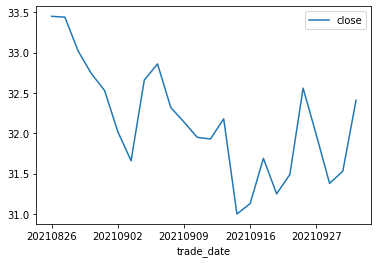

In [5]:
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandocfilters import Math

ts.set_token('your token here')
# pro = ts.pro_api()
tu_token = 'fba0f69c02f5e4399b8dd63ae895ca69b7a55122a545c6f0f2c2bef3'
pro = ts.pro_api(tu_token)
#查询当前所有正常上市交易的股票列表
# data = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
# # 平治
# ts_code='300571.SZ'
# # 东财
# ts_code='601208.SH'
# 鱼跃
ts_code='002223.SZ'
# 解放
# ts_code = '000800.SZ'
# # 四维图新
# ts_code = '002405.SZ'
df = pro.daily(ts_code=ts_code, start_date='20210826')
df_last = df.shift(-1)
df_day = pd.concat([df.ts_code, df.trade_date,
                    df.close,
               ((df.close - df_last.close) / df_last.close * 100).astype(str),
                   (df.close - df_last.close)>0],
                   axis=1)
df_day.columns = ['股票代码', '交易日', '收盘价', '涨幅%','涨']
df = df.set_index('trade_date',drop=True)
# df_day.head(288)
df.iloc[::-1][['close']].plot()
plt.show()